In [1]:
%matplotlib inline
%time from hikyuu.interactive import *
from pylab import plot

2025-03-21 00:42:09,398 [INFO] runing in interactive session [<module>] (C:\Users\25858\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\hikyuu\__init__.py:118) [hikyuu::hku_info]
2025-03-21 00:42:09,399 [INFO] running in jupyter [<module>] (C:\Users\25858\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\hikyuu\__init__.py:125) [hikyuu::hku_info]


2025-03-21 00:42:09.404 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-03-21 00:42:09.407 [HKU-I] - Loading market information... (StockManager.cpp:482)
2025-03-21 00:42:09.408 [HKU-I] - Loading stock type information... (StockManager.cpp:500)
2025-03-21 00:42:09.408 [HKU-I] - Loading stock information... (StockManager.cpp:402)
2025-03-21 00:42:09.494 [HKU-I] - Loading stock weight... (StockManager.cpp:518)
2025-03-21 00:42:09.607 [HKU-I] - Loading block... (StockManager.cpp:113)
2025-03-21 00:42:09.735 [HKU-I] - Loading KData... (StockManager.cpp:117)
2025-03-21 00:42:09.735 [HKU-I] - Preloading all day kdata to buffer ! (StockManager.cpp:160)
2025-03-21 00:42:09.736 [HKU-I] - 0.33s Loaded Data. (StockManager.cpp:125)
CPU times: total: 2.41 s
Wall time: 2.89 s


In [2]:
# 创建一个系统策略
my_mm = MM_FixedCount(100)
# my_mm = MM_Nothing()
my_sg = my_sg = SG_Flex(EMA(CLOSE(), n=5), slow_n=10)
my_sys = SYS_Simple(sg=my_sg, mm=my_mm)

In [3]:
# 创建一个选择算法，用于在每日选定交易系统
# 此处是固定选择器，即每日选出的都是指定的交易系统
# my_se = SE_Fixed([s for s in blocka if s.valid], my_sys)
my_se = SE_Fixed([s for s in sm.get_block("指数板块", "沪深300")], my_sys)

In [4]:
# 创建一个资产分配器，用于确定如何在选定的交易系统中进行资产分配
# 此处创建的是一个等比例分配资产的分配器，即按相同比例在选出的系统中进行资金分配
my_af = AF_EqualWeight()

In [5]:
# 创建资产组合
# 创建一个从2001年1月1日开始的账户，初始资金200万元。这里由于使用的等比例分配器，意味着将账户剩余资金在所有选中的系统中平均分配，
# 如果初始资金过小，将导致每个系统都没有充足的资金完成交易。
my_tm = crtTM(Datetime(202401010000), 2000000)
my_pf = PF_Simple(tm=my_tm, af=my_af, se=my_se)

In [6]:
# 运行投资组合
q = Query(-500)
%time my_pf.run(Query(-500), 10)

CPU times: total: 9.48 s
Wall time: 9.87 s


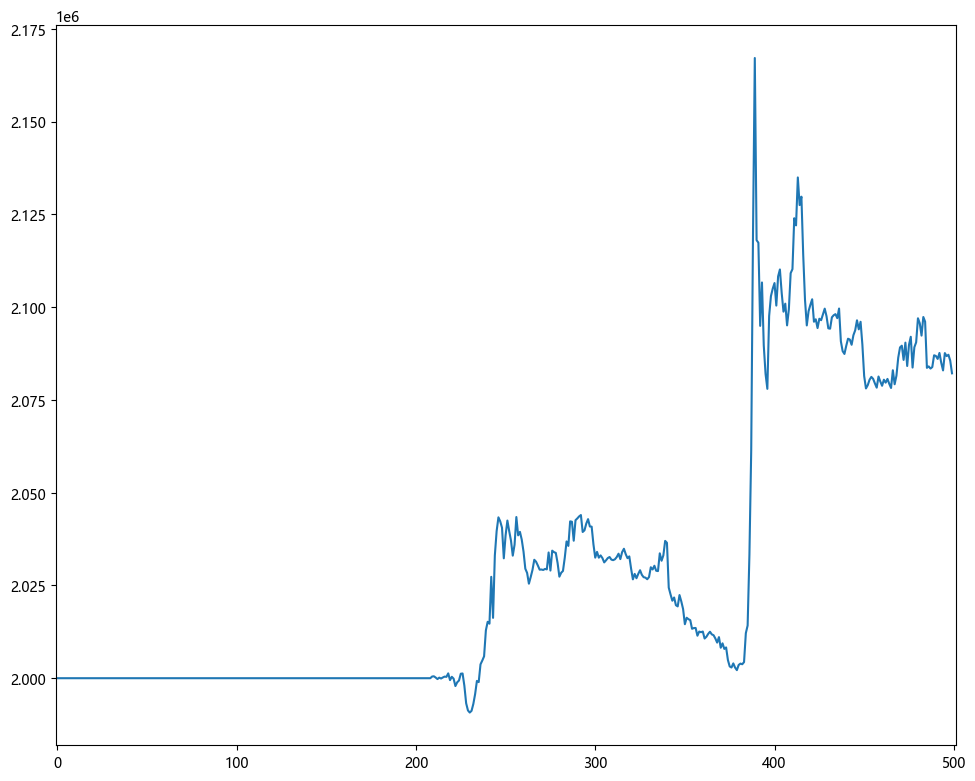

In [7]:
x = my_tm.get_funds_curve(sm.get_trading_calendar(q))
PRICELIST(x).plot()

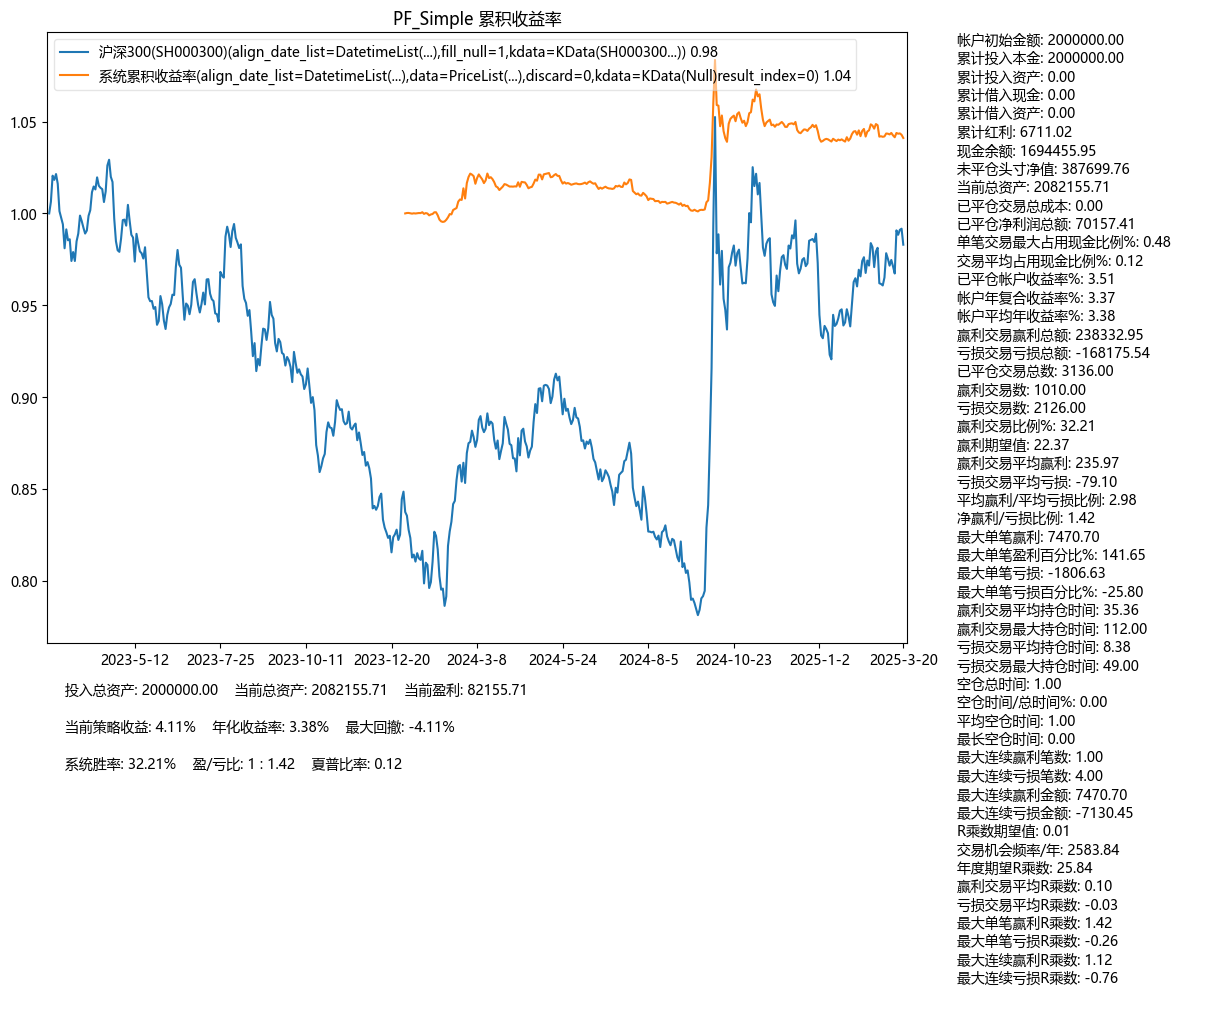

In [8]:
my_pf.performance()

In [9]:
my_tm

TradeManager {
  params: params[precision(int): 2, save_action(bool): 1, support_borrow_cash(bool): 0, support_borrow_stock(bool): 0, ],
  name: SYS,
  init_date: 2024-01-01 00:00:00,
  init_cash: 2000000.00,
  firstDatetime: 2024-01-03 00:00:00,
  lastDatetime: 2025-03-20 00:00:00,
  TradeCostFunc: TradeCostFunc(TC_Zero, params[]),
  current total funds: 2082155.71,
  current cash: 1694455.95,
  current market_value: 387699.76,
  current short_market_value: 0.00,
  current base_cash: 2000000.00,
  current base_asset: 0.00,
  current borrow_cash: 0.00,
  current borrow_asset: 0.00,
  Position: 
    SH600025 华能水电 2025-03-17 00:00:00 4 100.00 875.00 884.00 9.00 1.03% 0.00%
    SH600010 包钢股份 2025-03-10 00:00:00 9 100.00 186.00 187.00 1.00 0.54% 0.00%
    SH600029 南方航空 2025-03-18 00:00:00 3 100.00 594.00 590.00 -4.00 -0.67% -0.00%
    SH600016 民生银行 2025-03-17 00:00:00 4 100.00 416.00 414.00 -2.00 -0.48% -0.00%
    SH600000 浦发银行 2025-03-17 00:00:00 4 100.00 1055.00 1066.00 11.00 1.04% 0.00%